In [ ]:
!pip install PyPortfolioOpt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt import EfficientFrontier, CovarianceShrinkage, expected_returns
import yfinance as yf

In [ ]:
# # URL of the Wikipedia page with S&P 500 constituents
# url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# # Read the table from the webpage
# tables = pd.read_html(url)

# # Extract the first table, which contains the S&P 500 tickers
# sp500_table = tables[0]

# # Get the 'Symbol' column (tickers) as a list
# get_tickers = sp500_table['Symbol'].tolist()

# # Remove 6 stocks because yfinance doesn't have data on them
# remove_stocks = {'SOLV', 'GEV', 'SW', 'AMTM', 'BF.B', 'BRK.B'}

# # Remove the specified strings
# sp500_tickers = [item for item in get_tickers if item not in remove_stocks]

# # Display the list of tickers
# print(sp500_tickers)

In [ ]:
# len(sp500_tickers)

In [ ]:
# def get_tickers_with_inferred_ipo_date(tickers, cutoff_date):
#     """
#     Filters tickers by IPO date inferred from historical stock data.

#     Parameters:
#     - tickers (list): List of stock tickers.
#     - cutoff_date (str): Only include tickers IPO'd before this date (YYYY-MM-DD format).

#     Returns:
#     - list: Filtered tickers that IPO'd before the cutoff date.
#     """
#     filtered_tickers = []
#     cutoff_date = pd.to_datetime(cutoff_date)  # Ensure cutoff_date is timezone-naive

#     for ticker in tickers:
#         try:
#             # Download historical data for the ticker
#             history = yf.Ticker(ticker).history(period="max")

#             # Infer IPO date as the first available date in the history
#             if not history.empty:
#                 first_date = history.index.min().tz_localize(None)  # Convert to timezone-naive
#                 if first_date < cutoff_date:
#                     filtered_tickers.append(ticker)
#         except Exception as e:
#             print(f"Error retrieving data for {ticker}: {e}")

#     return filtered_tickers

In [ ]:
# def download_and_save_stock_data(tickers, start_date, end_date, filename):
#     """
#     Downloads historical stock data for a given list of tickers and saves it to a CSV file.

#     Parameters:
#     - tickers (list): List of stock tickers to download.
#     - start_date (str): Start date for historical data in YYYY-MM-DD format.
#     - end_date (str): End date for historical data in YYYY-MM-DD format.
#     - filename (str): Name of the file to save the data.

#     Returns:
#     - None: Saves the data to a CSV file.
#     """
#     print(f"Downloading data for {len(tickers)} tickers...")
#     data = yf.download(tickers, start=start_date, end=end_date, progress=True)['Adj Close']
#     print(f"Data downloaded successfully for {len(data.columns)} tickers.")

#     # Drop rows with NaN values to ensure clean data
#     data = data.dropna(how="any")
#     data.to_csv(filename)
#     print(f"Cleaned data saved to {filename}")

In [ ]:
# start_date = '2010-01-01'
# end_date = '2024-12-01'
# cutoff_date = '2015-01-01'
# output_file = 'stock_data.csv'

# # Filter tickers by inferred IPO date
# filtered_tickers = get_tickers_with_inferred_ipo_date(sp500_tickers, cutoff_date)
# print(f"Tickers IPO'd before {cutoff_date}: {filtered_tickers}")

In [ ]:
# # Download and save data for filtered tickers
# if filtered_tickers:
#     download_and_save_stock_data(filtered_tickers, start_date, end_date, output_file)
# else:
#     print("No tickers IPO'd before the specified date.")

In [ ]:
df = pd.read_csv('stock_data.csv', index_col='Date', parse_dates=True) # I uploaded it in zip, so you don't need to run yf codes above

In [ ]:
df

,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-20,34.464897,22.120070,35.973175,34.265678,17.344389,64.800819,64.680000,36.543060,33.995369,58.982788,...,91.356766,22.171232,155.146622,23.564182,58.931446,29.588327,41.120369,88.945534,66.279999,32.868011
2014-10-21,35.551186,22.720964,37.216145,35.034290,17.639168,66.063950,66.430000,37.671940,34.219990,60.156830,...,92.642212,22.457964,157.648972,23.688290,60.138706,30.290522,41.518890,90.855576,67.910004,33.499191
2014-10-22,34.925755,22.836267,37.619450,34.373108,17.642338,65.665504,65.040001,37.107513,34.264931,59.996029,...,91.988220,22.184572,155.795731,23.870783,59.804783,29.895546,41.120369,89.851227,67.129997,33.313538
2014-10-23,35.360268,23.244253,39.351658,35.067348,17.483854,66.191116,65.919998,37.430038,34.100189,60.663433,...,91.334236,22.497971,156.709549,23.870783,60.434116,30.764494,41.191730,93.769897,69.029999,33.517754
2014-10-24,35.584106,23.330734,39.860748,35.092148,17.648676,66.420013,67.010002,37.776764,34.130150,61.274590,...,91.514618,22.597988,157.760010,24.016783,60.678135,31.019053,41.566490,94.415550,69.300003,33.954018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,133.839996,229.869995,176.949997,117.760002,99.690002,358.660004,512.150024,213.685211,53.130001,305.149994,...,314.399994,31.046862,91.290001,71.349998,121.790001,126.515785,134.617691,110.220001,397.190002,176.960007
2024-11-25,134.490005,232.869995,177.059998,118.129997,100.059998,361.290009,518.729980,222.637314,53.009998,304.670013,...,314.630005,32.030743,93.449997,71.599998,119.970001,128.580002,136.389114,110.959999,400.940002,178.710007
2024-11-26,134.369995,235.059998,181.139999,117.959999,100.410004,363.179993,525.299988,218.126419,53.720001,307.970001,...,316.649994,31.712721,91.860001,71.870003,117.970001,124.540001,137.961502,110.639999,402.450012,175.699997


In [ ]:
# This is essentially the filtered_tickers
# Since I don't want to run data importing code each time, I get the tickers from csv file

full_tickers_list = df.columns.tolist()

In [ ]:
class Portfolio:
    # Class-level attributes to store generated portfolios and optimal portfolio metrics
    generated_portfolios = {'Return': [], 'Volatility': []}
    optimal_portfolio_metrics = {'Return': None, 'Volatility': None}

    # Class-level preloaded data
    stock_data = pd.DataFrame()

    @classmethod
    def load_data(cls, csv_path):
        """
        Load pre-downloaded stock data from a CSV file.

        Parameters:
        - csv_path (str): Path to the CSV file containing historical stock data.

        Returns:
        - None: Sets the stock_data class attribute.
        """
        cls.stock_data = pd.read_csv(csv_path, index_col=0, parse_dates=True)

    def __init__(self, tickers, weights, start_date, end_date):
        self.tickers = tickers
        self.weights = np.array(weights)
        self.start_date = start_date
        self.end_date = end_date
        self.data = self._fetch_data()
        self.returns = self.data.pct_change().dropna()
        self.benchmark_returns = self._fetch_benchmark()

    def _fetch_data(self):
        """
        Filter the preloaded data for the selected tickers and date range.

        Returns:
        - pd.DataFrame: Filtered data for the selected tickers and date range.
        """
        if Portfolio.stock_data.empty:
            raise ValueError("Stock data is not loaded. Use Portfolio.load_data(csv_path) to load data.")

        filtered_data = Portfolio.stock_data.loc[self.start_date:self.end_date, self.tickers]
        if filtered_data.isnull().values.any():
            raise ValueError("Missing data for selected tickers in the specified date range.")
        return filtered_data

    def _fetch_benchmark(self):
        """
        Simulate a benchmark (e.g., S&P 500) by averaging the returns of all loaded stocks.

        Returns:
        - np.array: Benchmark daily returns.
        """
        benchmark = Portfolio.stock_data.mean(axis=1).loc[self.start_date:self.end_date]
        return benchmark.pct_change().dropna().values.reshape(-1, 1)

    def calculate_portfolio_return_series(self):
        return self.returns.dot(self.weights)

    def calculate_annualized_return(self):
        daily_return = np.dot(self.weights, self.returns.mean())
        return daily_return * 252

    def calculate_annualized_volatility(self):
        covariance_matrix = self.returns.cov() * 252
        portfolio_variance = np.dot(self.weights.T, np.dot(covariance_matrix, self.weights))
        return np.sqrt(portfolio_variance)

    def calculate_r_squared(self):
        port_ret_series = self.calculate_portfolio_return_series()
        lin_reg = LinearRegression().fit(self.benchmark_returns, port_ret_series.values.reshape(-1, 1))
        return lin_reg.score(self.benchmark_returns, port_ret_series.values.reshape(-1, 1))

    def calculate_idiosyncratic_risk(self):
        port_ret_series = self.calculate_portfolio_return_series()
        lin_reg = LinearRegression().fit(self.benchmark_returns, port_ret_series.values.reshape(-1, 1))
        residuals = port_ret_series.values - (self.benchmark_returns.flatten() * lin_reg.coef_[0][0] + lin_reg.intercept_[0])
        return np.std(residuals)

    def calculate_var(self, confidence_level=0.95):
        portfolio_mean = self.calculate_annualized_return() / 252
        portfolio_std = self.calculate_annualized_volatility() / np.sqrt(252)
        z_score = norm.ppf(1 - confidence_level)
        return -(portfolio_mean + z_score * portfolio_std) * np.sqrt(252)

    def calculate_cvar(self, confidence_level=0.95):
        portfolio_mean = self.calculate_annualized_return() / 252
        portfolio_std = self.calculate_annualized_volatility() / np.sqrt(252)
        z_score = norm.ppf(1 - confidence_level)
        conditional_var = portfolio_mean + portfolio_std * (norm.pdf(z_score) / (1 - confidence_level))
        return -conditional_var * np.sqrt(252)

    def get_risk_metrics(self):
        return {
            'Annualized Return': self.calculate_annualized_return() * 100,
            'Annualized Volatility': self.calculate_annualized_volatility() * 100,
            'R²': self.calculate_r_squared() * 100,
            'Idiosyncratic Risk': self.calculate_idiosyncratic_risk() * 100,
            'VaR': self.calculate_var() * 100,
            'CVaR': self.calculate_cvar() * 100
        }

    def explain_risk_metrics(self):
        metrics = self.get_risk_metrics()
        explanations = {
            'Annualized Return': (
                f"Annualized Return: {metrics['Annualized Return']:.2f}%\n"
                f"This represents the expected return for the portfolio over one year."
            ),
            'Annualized Volatility': (
                f"Annualized Volatility: {metrics['Annualized Volatility']:.2f}%\n"
                f"Expected risk or variability in portfolio returns over a year."
            ),
            'R²': (
                f"R² (Systematic Risk): {metrics['R²']:.2f}%\n"
                f"Explains the proportion of portfolio variance due to market movements."
            ),
            'Idiosyncratic Risk': (
                f"Idiosyncratic Risk: {metrics['Idiosyncratic Risk']:.2f}%\n"
                f"Shows the unique portfolio risk not explained by the market."
            ),
            'VaR': (
                f"Value at Risk (VaR): {metrics['VaR']:.2f}%\n"
                f"Maximum potential loss over a specified period with a 95% confidence."
            ),
            'CVaR': (
                f"Conditional Value at Risk (CVaR): {metrics['CVaR']:.2f}%\n"
                f"Average loss expected in the worst 5% of scenarios."
            )
        }
        return explanations

    @classmethod
    def optimize_with_pypfopt(cls, data, original_weights, original_return, original_volatility, optimize_for="sharpe"):
        """
        Optimize a portfolio using PyPortfolioOpt with constraints on return, volatility, and weight sum.

        Parameters:
        - data: pd.DataFrame: Historical price data for the assets.
        - original_weights: np.array: Current portfolio weights.
        - original_return: float: Minimum acceptable return.
        - original_volatility: float: Maximum acceptable volatility.
        - optimize_for (str): Optimization goal ("sharpe", "return", or "volatility").

        Returns:
        - optimized_weights: dict: Optimal weights for the portfolio.
        - cleaned_weights: dict: Cleaned and rounded weights for the portfolio.
        """
        # Calculate expected returns and the covariance matrix
        mu = mean_historical_return(data)
        S = CovarianceShrinkage(data).ledoit_wolf()

        # Optimize portfolio using PyPortfolioOpt
        ef = EfficientFrontier(mu, S)

        if optimize_for == "sharpe":
            optimized_weights = ef.max_sharpe()
        elif optimize_for == "return":
            optimized_weights = ef.max_quadratic_utility()
        elif optimize_for == "volatility":
            optimized_weights = ef.min_volatility()
        else:
            raise ValueError("Invalid optimization goal. Choose 'sharpe', 'return', or 'volatility'.")

        cleaned_weights = ef.clean_weights()

        # Output the optimized weights and performance
        return optimized_weights, cleaned_weights

    @classmethod
    def optimize_user_portfolio(cls, portfolio_input, start_date, end_date, optimize_for="sharpe", build_new=False):
        """
        Optimize the user-provided portfolio (dictionary format) and return the optimized portfolio metrics.

        Parameters:
        - portfolio_input (dict): Dictionary of portfolio {'ticker': shares, ...}.
        - start_date (str): Start date for historical data.
        - end_date (str): End date for historical data.
        - optimize_for (str): Optimization goal ("sharpe", "return", or "volatility").
        - build_new (bool): Whether to build a new portfolio or use existing tickers.

        Returns:
        - None: Prints optimized portfolio results.
        """
        tickers = list(portfolio_input.keys())
        shares = list(portfolio_input.values())
        total_shares = sum(shares)
        original_weights = [share / total_shares for share in shares]

        original_portfolio = cls(tickers, original_weights, start_date, end_date)
        original_return = original_portfolio.calculate_annualized_return()
        original_volatility = original_portfolio.calculate_annualized_volatility()

        if build_new:
            data = cls.stock_data.loc[start_date:end_date, full_tickers_list]
        else:
            data = cls.stock_data.loc[start_date:end_date, tickers]

        if data.isnull().values.any():
            raise ValueError("Missing data for selected tickers in the specified date range.")

        optimized_weights, cleaned_weights = cls.optimize_with_pypfopt(data, original_weights, original_return, original_volatility, optimize_for)

        end_prices = data.iloc[-1]
        portfolio_value = sum(shares[i] * end_prices[ticker] for i, ticker in enumerate(tickers))

        optimized_shares = {}
        remaining_cash = portfolio_value

        for ticker, weight in cleaned_weights.items():
            if weight > 0:
                shares_to_buy = int((portfolio_value * weight) / end_prices[ticker])
                optimized_shares[ticker] = shares_to_buy
                remaining_cash -= shares_to_buy * end_prices[ticker]

        print("Optimized portfolio metrics:")
        cls.evaluate_portfolio({ticker: shares for ticker, shares in optimized_shares.items()}, start_date, end_date)

        print("\nOptimized portfolio allocation:")
        for ticker, shares in optimized_shares.items():
            print(f"{ticker}: {shares} shares")
        print(f"Remaining cash: ${remaining_cash:.2f}")

        return optimized_shares

    @classmethod
    def evaluate_portfolio(cls, portfolio_input, start_date, end_date):
        """
        Evaluate the user-provided portfolio (dictionary format) and return its risk metrics.

        Parameters:
        - portfolio_input (dict): Dictionary of portfolio {'ticker': shares, ...}.
        - start_date (str): Start date for historical data.
        - end_date (str): End date for historical data.

        Returns:
        - None: Prints evaluation results.
        """
        tickers = list(portfolio_input.keys())
        shares = list(portfolio_input.values())
        total_shares = sum(shares)
        weights = [share / total_shares for share in shares]

        portfolio = cls(tickers, weights, start_date, end_date)
        risk_metrics = portfolio.get_risk_metrics()
        explanations = portfolio.explain_risk_metrics()

        print("Your current portfolio metrics:")
        for metric, value in risk_metrics.items():
            print(f"{metric}: {value:.2f}%")

        print("\nExplanations:")
        for explanation in explanations.values():
            print(explanation)

In [ ]:
# Load pre-downloaded sp500 stocks' data
Portfolio.load_data("stock_data.csv")

In [ ]:
user_portfolio = {
    'NVDA': 35,  # Semiconductors
    'AAPL': 30,  # Technology
    'MSFT': 25,  # Technology
    'XOM': 20,   # Energy
    'JNJ': 30,   # Healthcare
    'TSLA': 25,  # Automotive/Technology
    'WMT': 40,   # Retail
    'PG': 35,    # Consumer Goods
    'FSLR': 15,
    'DECK': 18
}



# Put the date that you have established this portfolio
investment_started = '2016-01-01'

# Today's date (I keep it to 2024 Jan 1st, so we have rest of 2024 to backtest)
today = '2020-01-01'

In [ ]:
Portfolio.evaluate_portfolio(user_portfolio, start_date=investment_started, end_date=today)

Your current portfolio metrics:
Annualized Return: 25.85%
Annualized Volatility: 15.71%
R²: 66.86%
Idiosyncratic Risk: 0.57%
VaR: 24.21%
CVaR: -34.03%

Explanations:
Annualized Return: 25.85%
This represents the expected return for the portfolio over one year.
Annualized Volatility: 15.71%
Expected risk or variability in portfolio returns over a year.
R² (Systematic Risk): 66.86%
Explains the proportion of portfolio variance due to market movements.
Idiosyncratic Risk: 0.57%
Shows the unique portfolio risk not explained by the market.
Value at Risk (VaR): 24.21%
Maximum potential loss over a specified period with a 95% confidence.
Conditional Value at Risk (CVaR): -34.03%
Average loss expected in the worst 5% of scenarios.


In [ ]:
adjusted_portfolio_sharpe = Portfolio.optimize_user_portfolio(user_portfolio, start_date=investment_started, end_date=today, build_new=False)

Optimized portfolio metrics:
Your current portfolio metrics:
Annualized Return: 47.84%
Annualized Volatility: 30.48%
R²: 36.24%
Idiosyncratic Risk: 1.53%
VaR: 47.12%
CVaR: -65.89%

Explanations:
Annualized Return: 47.84%
This represents the expected return for the portfolio over one year.
Annualized Volatility: 30.48%
Expected risk or variability in portfolio returns over a year.
R² (Systematic Risk): 36.24%
Explains the proportion of portfolio variance due to market movements.
Idiosyncratic Risk: 1.53%
Shows the unique portfolio risk not explained by the market.
Value at Risk (VaR): 47.12%
Maximum potential loss over a specified period with a 95% confidence.
Conditional Value at Risk (CVaR): -65.89%
Average loss expected in the worst 5% of scenarios.

Optimized portfolio allocation:
NVDA: 458 shares
AAPL: 24 shares
MSFT: 21 shares
JNJ: 2 shares
WMT: 101 shares
PG: 37 shares
DECK: 88 shares
Remaining cash: $301.85


In [ ]:
adjusted_portfolio_return = Portfolio.optimize_user_portfolio(user_portfolio, start_date=investment_started, end_date=today, build_new=False, optimize_for='return')

Optimized portfolio metrics:
Your current portfolio metrics:
Annualized Return: 60.08%
Annualized Volatility: 44.55%
R²: 26.95%
Idiosyncratic Risk: 2.40%
VaR: 69.49%
CVaR: -95.67%

Explanations:
Annualized Return: 60.08%
This represents the expected return for the portfolio over one year.
Annualized Volatility: 44.55%
Expected risk or variability in portfolio returns over a year.
R² (Systematic Risk): 26.95%
Explains the proportion of portfolio variance due to market movements.
Idiosyncratic Risk: 2.40%
Shows the unique portfolio risk not explained by the market.
Value at Risk (VaR): 69.49%
Maximum potential loss over a specified period with a 95% confidence.
Conditional Value at Risk (CVaR): -95.67%
Average loss expected in the worst 5% of scenarios.

Optimized portfolio allocation:
NVDA: 3140 shares
Remaining cash: $2.01


In [ ]:
adjusted_portfolio_volatility = Portfolio.optimize_user_portfolio(user_portfolio, start_date=investment_started, end_date=today, build_new=False, optimize_for='volatility')

Optimized portfolio metrics:
Your current portfolio metrics:
Annualized Return: 17.58%
Annualized Volatility: 12.27%
R²: 51.14%
Idiosyncratic Risk: 0.54%
VaR: 19.07%
CVaR: -26.41%

Explanations:
Annualized Return: 17.58%
This represents the expected return for the portfolio over one year.
Annualized Volatility: 12.27%
Expected risk or variability in portfolio returns over a year.
R² (Systematic Risk): 51.14%
Explains the proportion of portfolio variance due to market movements.
Idiosyncratic Risk: 0.54%
Shows the unique portfolio risk not explained by the market.
Value at Risk (VaR): 19.07%
Maximum potential loss over a specified period with a 95% confidence.
Conditional Value at Risk (CVaR): -26.41%
Average loss expected in the worst 5% of scenarios.

Optimized portfolio allocation:
AAPL: 13 shares
MSFT: 2 shares
XOM: 59 shares
JNJ: 35 shares
TSLA: 2 shares
WMT: 79 shares
PG: 49 shares
DECK: 30 shares
Remaining cash: $275.05


In [ ]:
built_new_portfolio_sharpe = Portfolio.optimize_user_portfolio(user_portfolio, start_date=investment_started, end_date=today, build_new=True)

Optimized portfolio metrics:
Your current portfolio metrics:
Annualized Return: 33.88%
Annualized Volatility: 11.79%
R²: 55.79%
Idiosyncratic Risk: 0.49%
VaR: 17.26%
CVaR: -26.45%

Explanations:
Annualized Return: 33.88%
This represents the expected return for the portfolio over one year.
Annualized Volatility: 11.79%
Expected risk or variability in portfolio returns over a year.
R² (Systematic Risk): 55.79%
Explains the proportion of portfolio variance due to market movements.
Idiosyncratic Risk: 0.49%
Shows the unique portfolio risk not explained by the market.
Value at Risk (VaR): 17.26%
Maximum potential loss over a specified period with a 95% confidence.
Conditional Value at Risk (CVaR): -26.45%
Average loss expected in the worst 5% of scenarios.

Optimized portfolio allocation:
AMCR: 70 shares
AMD: 13 shares
AXON: 1 shares
BRO: 6 shares
CME: 8 shares
CPRT: 99 shares
CZR: 9 shares
DECK: 19 shares
DHR: 2 shares
DPZ: 0 shares
ENPH: 5 shares
ETR: 2 shares
KDP: 17 shares
LRCX: 11 shar

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
built_new_portfolio_return = Portfolio.optimize_user_portfolio(user_portfolio, start_date=investment_started, end_date=today, build_new=True, optimize_for='return')

Optimized portfolio metrics:
Your current portfolio metrics:
Annualized Return: 91.33%
Annualized Volatility: 65.32%
R²: 16.68%
Idiosyncratic Risk: 3.75%
VaR: 101.69%
CVaR: -140.49%

Explanations:
Annualized Return: 91.33%
This represents the expected return for the portfolio over one year.
Annualized Volatility: 65.32%
Expected risk or variability in portfolio returns over a year.
R² (Systematic Risk): 16.68%
Explains the proportion of portfolio variance due to market movements.
Idiosyncratic Risk: 3.75%
Shows the unique portfolio risk not explained by the market.
Value at Risk (VaR): 101.69%
Maximum potential loss over a specified period with a 95% confidence.
Conditional Value at Risk (CVaR): -140.49%
Average loss expected in the worst 5% of scenarios.

Optimized portfolio allocation:
AMD: 401 shares
ENPH: 6 shares
Remaining cash: $-150.69


In [ ]:
built_new_portfolio_volatility = Portfolio.optimize_user_portfolio(user_portfolio, start_date=investment_started, end_date=today, build_new=True, optimize_for='volatility')

Optimized portfolio metrics:
Your current portfolio metrics:
Annualized Return: 12.90%
Annualized Volatility: 11.88%
R²: 9.09%
Idiosyncratic Risk: 0.71%
VaR: 18.73%
CVaR: -25.32%

Explanations:
Annualized Return: 12.90%
This represents the expected return for the portfolio over one year.
Annualized Volatility: 11.88%
Expected risk or variability in portfolio returns over a year.
R² (Systematic Risk): 9.09%
Explains the proportion of portfolio variance due to market movements.
Idiosyncratic Risk: 0.71%
Shows the unique portfolio risk not explained by the market.
Value at Risk (VaR): 18.73%
Maximum potential loss over a specified period with a 95% confidence.
Conditional Value at Risk (CVaR): -25.32%
Average loss expected in the worst 5% of scenarios.

Optimized portfolio allocation:
ACGL: 3 shares
AFL: 1 shares
ALL: 0 shares
AMCR: 232 shares
AZO: 0 shares
BG: 0 shares
BIIB: 0 shares
BK: 0 shares
BKR: 1 shares
BMY: 2 shares
CBOE: 10 shares
CCL: 1 shares
CHD: 2 shares
CHRW: 6 shares
CME: 

## Backtest

In [ ]:
# Redefine the corrected backtesting function
def calculate_portfolio_value(portfolio, df, start_date):
    """
    Calculate the portfolio value over time based on historical prices.

    Parameters:
    - portfolio (dict): Dictionary of {ticker: shares}.
    - df (pd.DataFrame): DataFrame of trade_data.csv
    - start_date (str): Start date for backtesting period

    Returns:
    - pd.Series: Portfolio value over time normalized to the starting value.
    """
    # Ensure the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Define the start date of backtest period 
    start_date = pd.Timestamp(start_date)

    # Filter data starting from the closest available date >= start_date
    filtered_df = df.loc[df.index >= start_date]

    if filtered_df.empty:
        raise ValueError("No data available after the start date.")

    # Get the starting prices for the portfolio
    starting_prices = filtered_df.iloc[0][portfolio.keys()]
    # Calculate the number of shares for each stock in the portfolio 
    shares = np.array(list(portfolio.values())) / starting_prices

    # Calculate daily portfolio values
    portfolio_values = (filtered_df[portfolio.keys()] * shares).sum(axis=1)

    # Normalize to starting value
    return portfolio_values / portfolio_values.iloc[0]

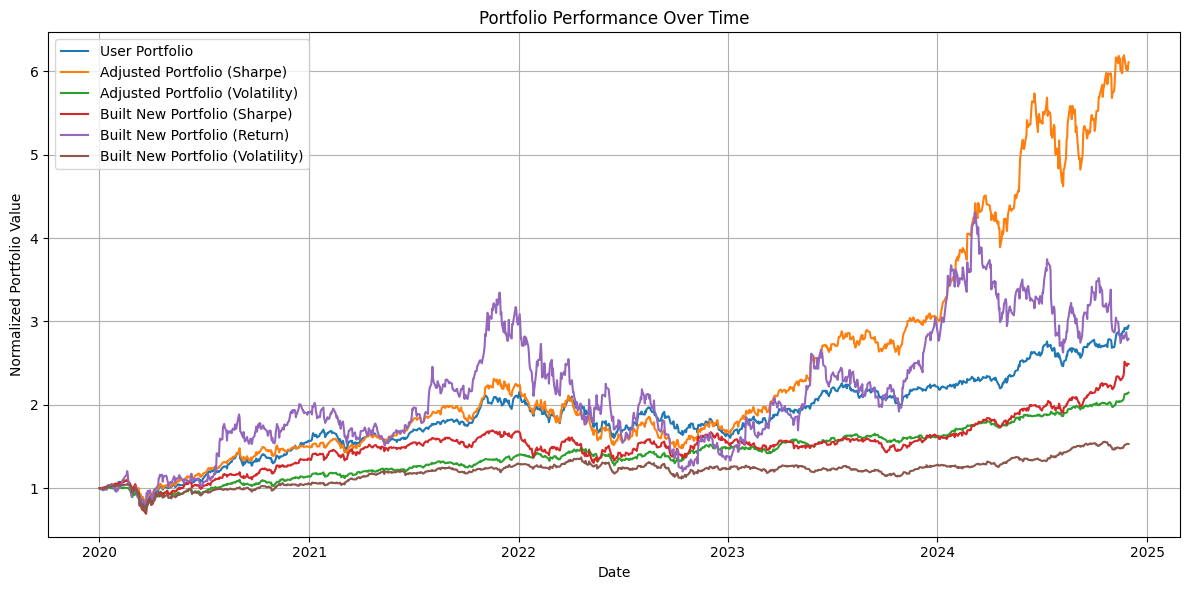

In [ ]:
# Run back-testing function to see how the portfolios would've performed in 2024

user_portfolio_values = calculate_portfolio_value(user_portfolio, df, today)
adjusted_portfolio_values_s = calculate_portfolio_value(adjusted_portfolio_sharpe, df, today)
adjusted_portfolio_values_r = calculate_portfolio_value(adjusted_portfolio_return, df, today)
adjusted_portfolio_values_v = calculate_portfolio_value(adjusted_portfolio_volatility, df, today)
built_new_portfolio_values_s = calculate_portfolio_value(built_new_portfolio_sharpe, df, today)
built_new_portfolio_values_r = calculate_portfolio_value(built_new_portfolio_return, df, today)
built_new_portfolio_values_v = calculate_portfolio_value(built_new_portfolio_volatility, df, today)

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(user_portfolio_values, label="User Portfolio")
plt.plot(adjusted_portfolio_values_s, label="Adjusted Portfolio (Sharpe)")
plt.plot(adjusted_portfolio_values_r, label="Adjusted Portfolio (Return)")
plt.plot(adjusted_portfolio_values_v, label="Adjusted Portfolio (Volatility)")
plt.plot(built_new_portfolio_values_s, label="Built New Portfolio (Sharpe)")
plt.plot(built_new_portfolio_values_r, label="Built New Portfolio (Return)")
plt.plot(built_new_portfolio_values_v, label="Built New Portfolio (Volatility)")
plt.title("Portfolio Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Portfolio Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

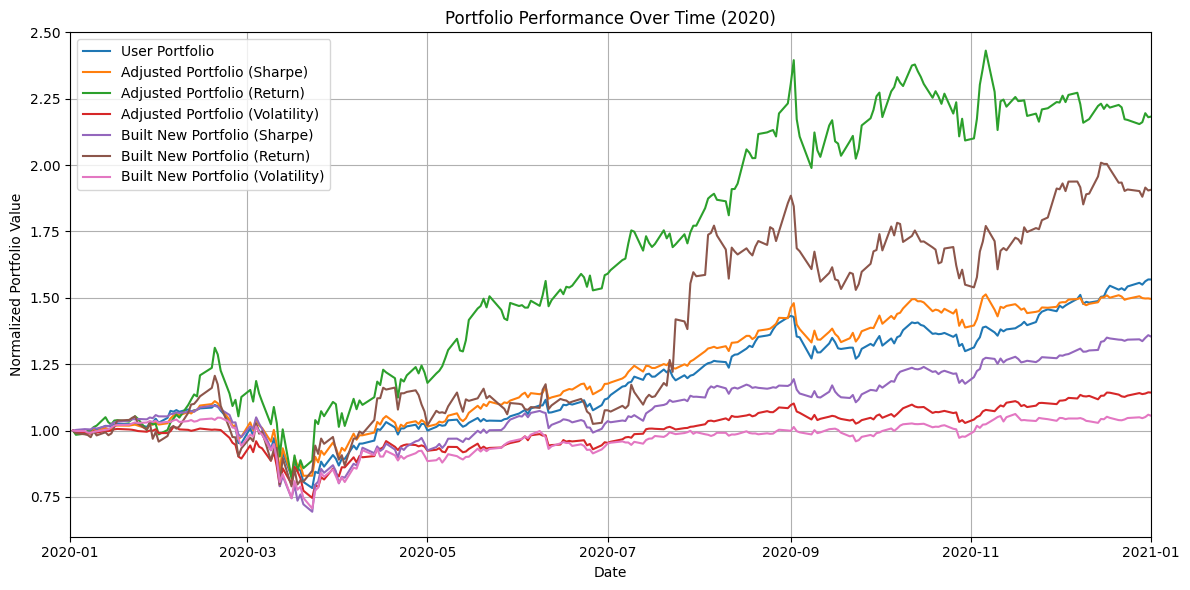

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(user_portfolio_values, label="User Portfolio")
plt.plot(adjusted_portfolio_values_s, label="Adjusted Portfolio (Sharpe)")
plt.plot(adjusted_portfolio_values_r, label="Adjusted Portfolio (Return)")
plt.plot(adjusted_portfolio_values_v, label="Adjusted Portfolio (Volatility)")
plt.plot(built_new_portfolio_values_s, label="Built New Portfolio (Sharpe)")
plt.plot(built_new_portfolio_values_r, label="Built New Portfolio (Return)")
plt.plot(built_new_portfolio_values_v, label="Built New Portfolio (Volatility)")

# Adjust x-axis and y-axis limits
plt.xlim(pd.Timestamp("2020-01-01"), pd.Timestamp("2021-01-01"))
plt.ylim(0.6, 2.5)  # Set y-limits manually based on the likely range of portfolio values

plt.title("Portfolio Performance Over Time (2020)")
plt.xlabel("Date")
plt.ylabel("Normalized Portfolio Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

